<a href="https://colab.research.google.com/github/paulsoumyadip/ted_talk_views_prediction/blob/main/Ted_Talks_Views_Prediction_Regression_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*   # **PROJECT NAME : *TED TALKS VIEWS PREDICTION***
*** ***
*   # **PROJECT OBJECTIVE : *TO PREDICT THE VIEWS OF A VIDEO UPLOADED TO TEDx WEBSITE***









## **PROBLEM DESCRIPTION/ BUSINESS CONTEXT :-**

******
* *TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.*

* *Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.*

* *As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.*

* *The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.*

*****

**DATA USED** : *data_ted_talks.csv* - *provided by AlmaBetter*
******

### *Even though TED talks are quite popular these days but we would still like to give a small description*
##**What is TED Talks?**

*A **TED talk** is a **public speaking** event in the form of **recorded video** presentation which was originally aired at the main TED annual event. TED refers to Technology, Entertainment, Design. TED Conferences, LLC is an American-Canadian non-profit media organization that has the main ideology of finding and sharing knowledge of the experts from different fields amoung the community.*

*TED was founded by Richard Saul Wurman and Harry Marks in February 1984 as a tech conference. Till date more than 13000 TED event has been held in 150 countries by TED and its sister TEDx for free consumption by all sorts of people. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates are among the luminaries on its speaker roster.*


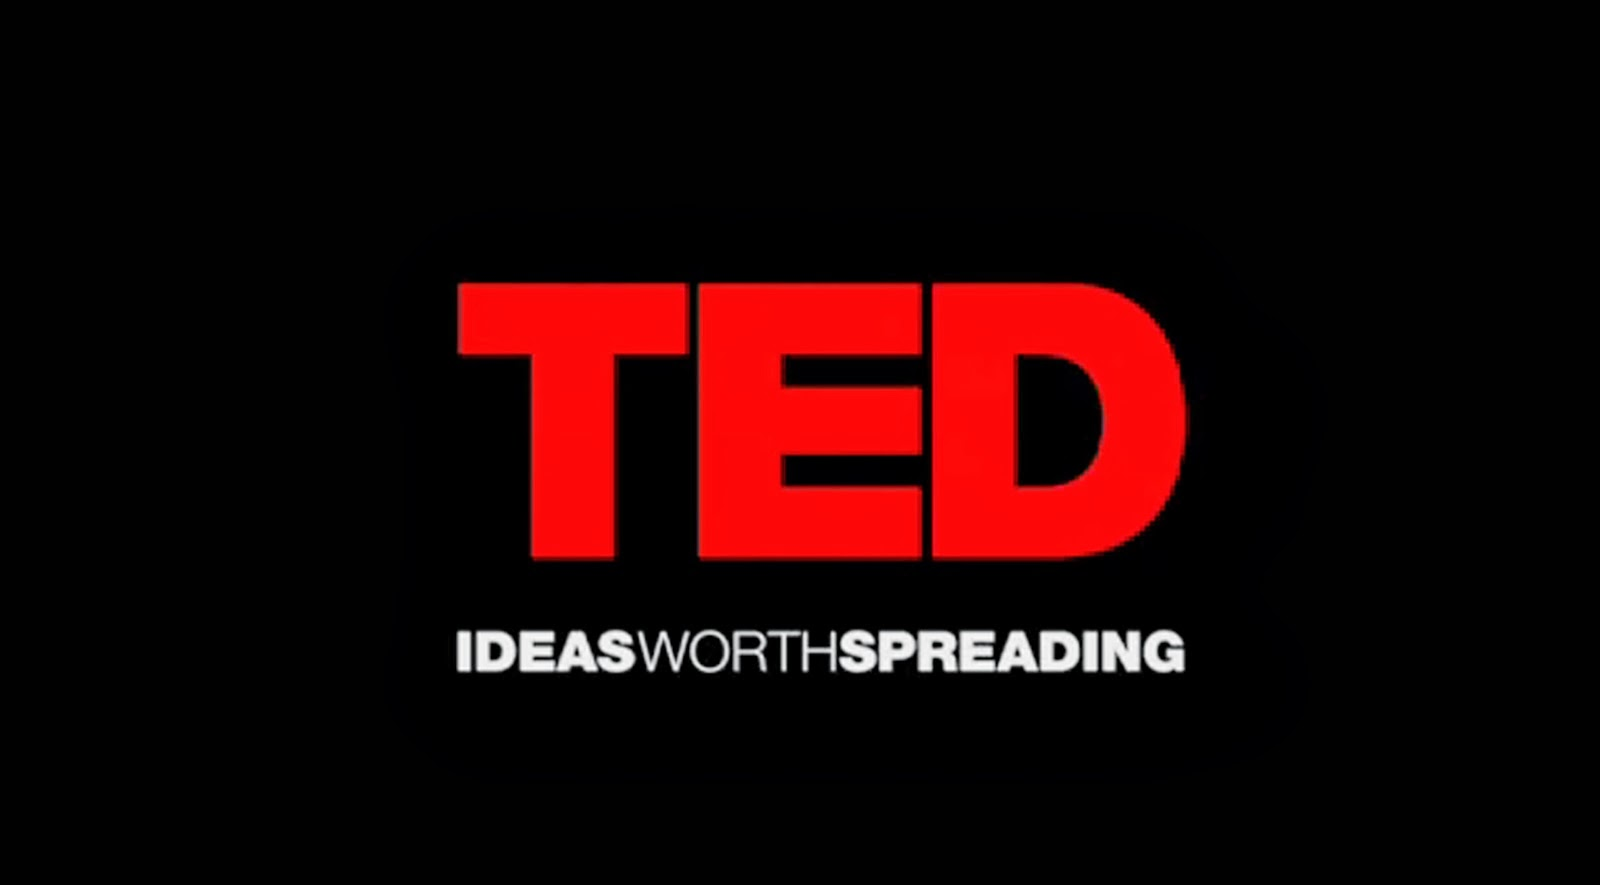


***The main goal is to create a prediction model using Supervised Regression so that it may be used to foretell how many people will watch a certain video that has been posted to TEDx website.***

##*So Let's Begin!*

# ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the regression models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset:
tedtalk_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Regression Capstone/Data Set for Ted Talks Views Prediction/data_ted_talks.csv")

In [3]:
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
#Checking the column names:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

*The views column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*





***The dataset contains features like:***


*   talk_id: Talk identification number provided by TED

*    title: Title of the talk

*     speaker_1: First speaker in TED's speaker list

*    all_speakers: Speakers in the talk

*    occupations: Occupations of the speakers

*    about_speakers: Blurb about each speaker

*    recorded_date: Date the talk was rcorded

*    published_date: Date the talk was published to TED.com

*    event: Event or medium in which the talk was given

*   native_lang: Language the talk was given in

*   available_lang: All available languages (lang_code) for a talk

*   comments: Count of comments

*   duration: Duration in seconds

*   topics: Related tags or topics for the talk

*   related_talks: Related talks (key='talk_id',value='title')

*   url: URL of the talk

*   description: Description of the talk

*   transcript: Full transcript of the talk

***And the target variable***

*  views : Count of views



###**Let's try to get the basic info of out Data set in an organized manner using a function:**

In [5]:
#function to get a summary of our Dataset
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Null/ Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Row'] = df.iloc[0].values
    summary['Second Row'] = df.iloc[1].values
    

    return summary

In [6]:
DataInfoAll(tedtalk_df)

Dataset Shape: (4005, 19)
---------------------------------------------------------------------------


,Name,dtypes,Null/ Missing,Uniques,First Row,Second Row
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


**We can clearly see that there are a few missing values in**


*   *occupations*
*   *about_speakers*
*   *comments*


 **and most of the feature variables are categorical.**
******


In [7]:
#NaN values in 'comment' can be converted to 0
tedtalk_df['comments'].fillna(0, inplace = True)
#Dropping the only NaN in 'recorded_date'
tedtalk_df = tedtalk_df.dropna(subset= ['recorded_date'])
#Dropping the NaN values in all_speakers column
tedtalk_df = tedtalk_df.dropna(subset= ['all_speakers'])
#Changing the NaN values of 'occupation' column to - Not available
tedtalk_df['occupations'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#Changing the NaN values of 'about_speakers' column to - Not available
tedtalk_df['about_speakers'].fillna(str({0:' Not available'}),inplace=True,axis=0)

In [8]:
tedtalk_df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


**We can se no that there are no NaN values left, now we can proceed to do other stuffs**
******
***Let's check for duplicate coloumns:***



In [9]:
tedtalk_df.duplicated().sum()

0

*There is no duplicate values, that's a good sign*

### **Categorizing Variable types:**
* data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] 


* data_numerical= data[['talk_id','views', 'duration']]


* data_target_variable(Y)  = data[['views']]

In [10]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
data_numerical= tedtalk_df[['views', 'duration']]

data_categorical= tedtalk_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']]

data_target_variable = tedtalk_df[['views']]

*Before we start with other columns let's change the the dates from object to Datetime format.*

In [12]:
tedtalk_df['recorded_date'] = pd.to_datetime(tedtalk_df['recorded_date'], format = '%Y-%m-%d')
tedtalk_df['published_date'] = pd.to_datetime(tedtalk_df['published_date'], format = '%Y-%m-%d')

In [13]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
tedtalk_df['published_month'] = pd.DatetimeIndex(tedtalk_df['published_date']).month
tedtalk_df['published_month'] = tedtalk_df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
tedtalk_df['published_day'] = pd.DatetimeIndex(tedtalk_df['published_date']).day

#Extracting year from published_date column
tedtalk_df['published_year'] = pd.DatetimeIndex(tedtalk_df['published_date']).year

#Extracting week day from published_date
tedtalk_df['dayofweek'] = tedtalk_df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
tedtalk_df['dayofweek_num']= tedtalk_df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
tedtalk_df['video_age_day'] = tedtalk_df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(tedtalk_df['published_date']))
tedtalk_df['video_age_day'] = tedtalk_df['video_age_day'].dt.days
tedtalk_df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


In [14]:
#Creating a daily average views section
tedtalk_df['avg_daily_views'] = tedtalk_df['views'] / tedtalk_df['video_age_day']
tedtalk_df.tail(3)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3,154804.666667
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1,56582.000000
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1,0.000000


**We can now see that the recorded_date and published_date columns are now in datetime format.**

## **EXPLORATORY DATA ANALYSIS AND VISUALIZATION** 

**Let's find the speaker with the highest views:**

In [46]:
df_2 = tedtalk_df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)


Text(0.5, 1.0, 'Count')

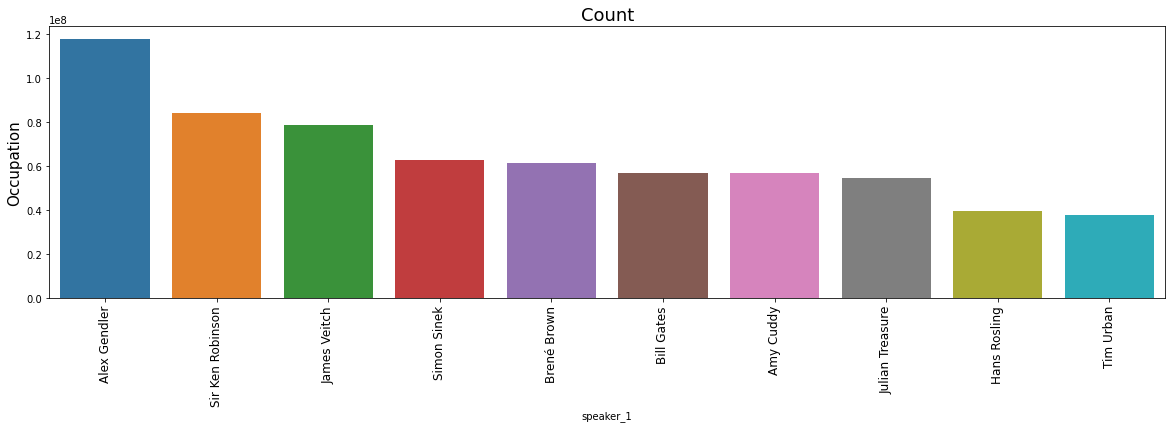

In [47]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

*Alex Gendler has highest views count followed by Sir Ken Robinson and james veitch*

**Top five video with the highest views:**

In [15]:
df_1 = tedtalk_df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]] 


,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


*Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.*

*It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.*

*There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.*

**Most popular event in TED talks**

In [49]:
df_3 = tedtalk_df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)

Text(0.5, 1.0, 'Event')

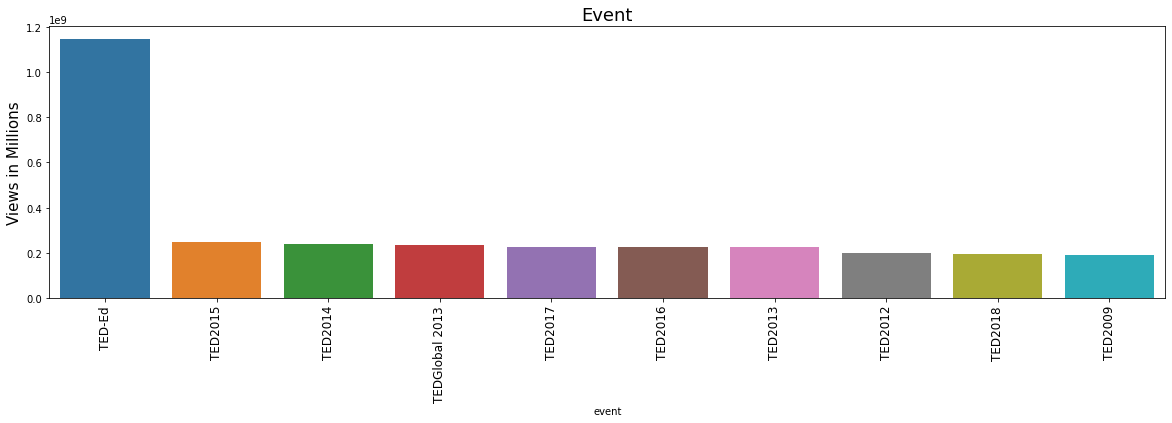

In [51]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Millions',fontsize = 15)
plt.title('Event',fontsize = 18)

Text(0.5, 1.0, 'Count')

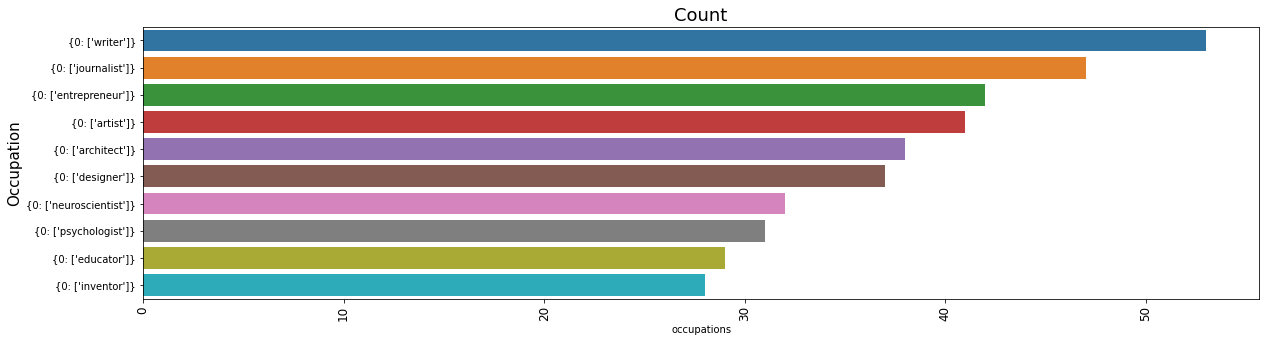

In [33]:
#Printing the top 15 most frequent speaker's occupations

plt.rcParams["figure.figsize"] = (15,4)

occ_df = tedtalk_df['occupations'].value_counts()[1:].head(10).reset_index()

plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

**Most of the speakers are writer followed by journalist and enterprenuer.**

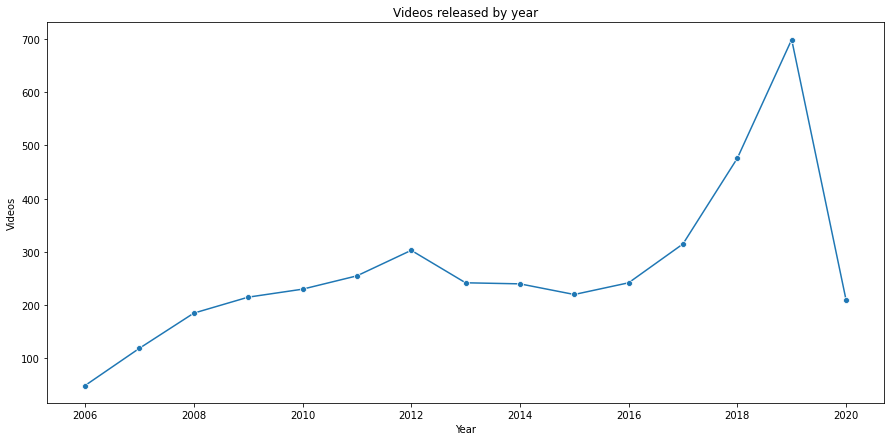

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(data=tedtalk_df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');

**The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic**